### Time-Series Forecasting using Autoregressive Moving Average (ARMA)

<h3>Time series :</h3>
data points that are collected sequentially at a regular interval with association over a time period is termed as time-series data.Time-series tend to have a linear relationship between lagged variables and this is called as autocorrelation. Hence a time-series historic data can be modelled to forecast the future data points without involvement of any other independent variables, these types of models are generally known as time-series forecasting.
<h3>Application of time series analysis</h3>
Some key areas of applications of time-series are sales forecasting, economic forecasting, stock market forecasting etc.

<h3>Autoregressive–moving-average model (ARMA) </h3>
Autoregressive–moving-average (ARMA) models provide a parsimonious description of a stationary stochastic process in terms of two polynomials, one for the autoregression and the second for the moving average.These models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARMA models are applied in some cases where data show evidence of non-stationarity.
<a href='https://en.wikipedia.org/wiki/Autoregressive%E2%80%93moving-average_model'>Source</a>

<h3>Stationarity</h3>
A stationary process is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance, if they are present, also do not change over time.
A time-series data having the mean and variance as constant is called stationary time-series.In order to apply ARMA for time series that is staionary we have to first check for stationarity and remove it.<a href='Stationary process'>Source</a>

<h3>Objective</h3>
We will analyse Hawaii Carbondioxide emission from from 1959 to 1990 and then forcast the future trend of the emission
<h3>Data</h3>
the dataset can be downloaded from <a href='http://www.stats.govt.nz/infoshare/Default.aspx'>Source</a>

<h3>Import Libraries</h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

from statsmodels.tsa.stattools import adfuller

# function to calculate MAE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.api import qqplot

In [3]:
data = pd.read_csv('./time_series/Carbon_dioxide_emissions_in_Hawaii.csv')

<h4>Display first five row of the dataset</h4>

In [4]:
print data.head()

     Month  Carbondioxide
0  1959M01         315.42
1  1959M02         316.32
2  1959M03         316.49
3  1959M04         317.56
4  1959M05         318.13


<h4>check the data types</h4>

In [5]:
data.dtypes

Month             object
Carbondioxide    float64
dtype: object

<h4>We will replace M with - for easier conversion to datetime </h4>

In [6]:
data.Month = data.Month.str.replace('M','-')

In [7]:
print data.head()

     Month  Carbondioxide
0  1959-01         315.42
1  1959-02         316.32
2  1959-03         316.49
3  1959-04         317.56
4  1959-05         318.13


<h4>Convert Month to datetime and make it an index of the series</h4>

In [8]:
time_series = pd.Series(list(data['Carbondioxide']),
                        index=pd.to_datetime(data['Month'],format='%Y-%m'))

In [9]:
print time_series.head()

Month
1959-01-01    315.42
1959-02-01    316.32
1959-03-01    316.49
1959-04-01    317.56
1959-05-01    318.13
dtype: float64


<h4>Visualize the trend and the seasonality of the data set</h4>

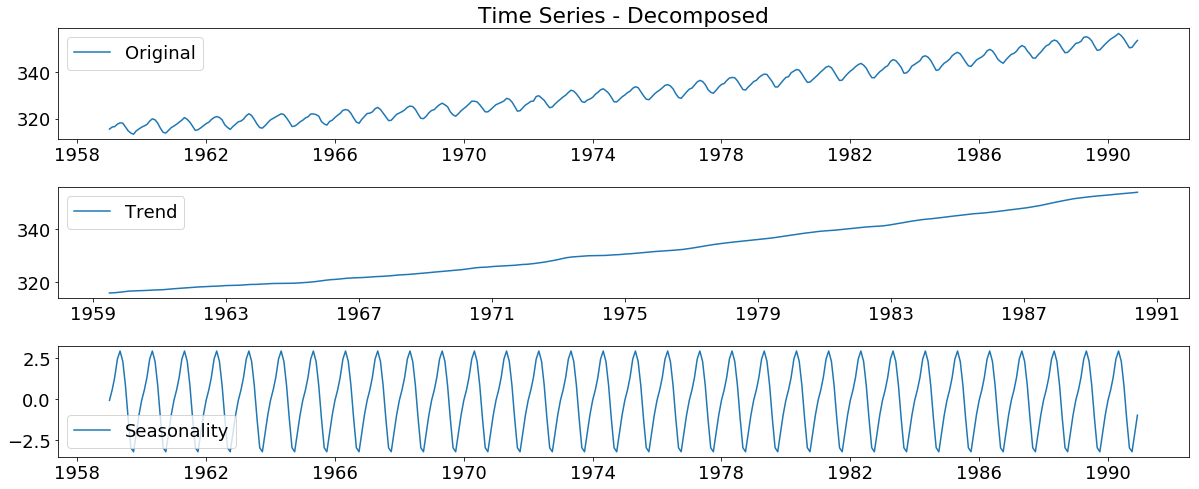

In [45]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)
decomposition = seasonal_decompose(time_series)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(17,9))
plt.subplot(411)
plt.title('Time Series - Decomposed')
plt.plot(time_series, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.tight_layout()

<h4> checking for staionarity</h4>

In [12]:
s_test = adfuller(time_series, autolag='AIC')
# extract p value from test results
print "p value > 0.05 means data is non-stationary: ", s_test[1]

p value > 0.05 means data is non-stationary:  1.0


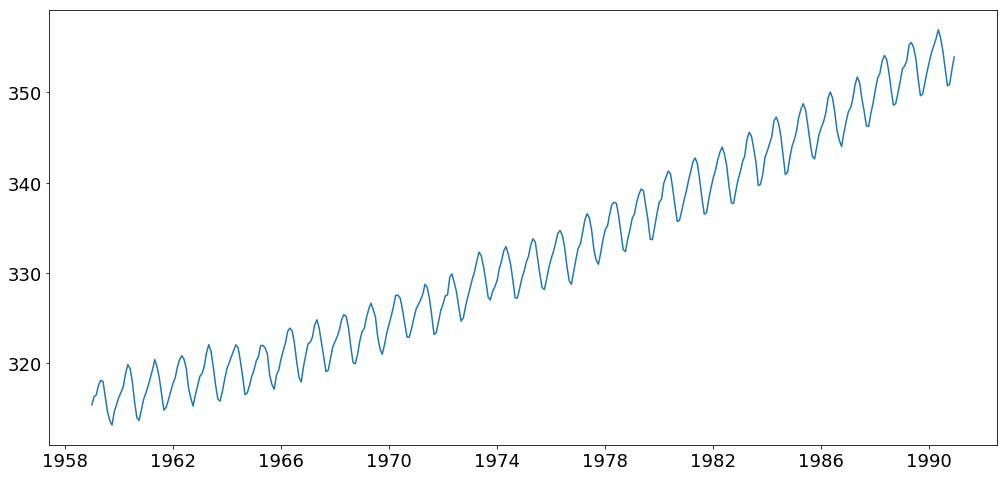

In [46]:
plt.figure(figsize=(17,8))
plt.plot(time_series)

<h3>Lets visulize Auto correlation test</h3>

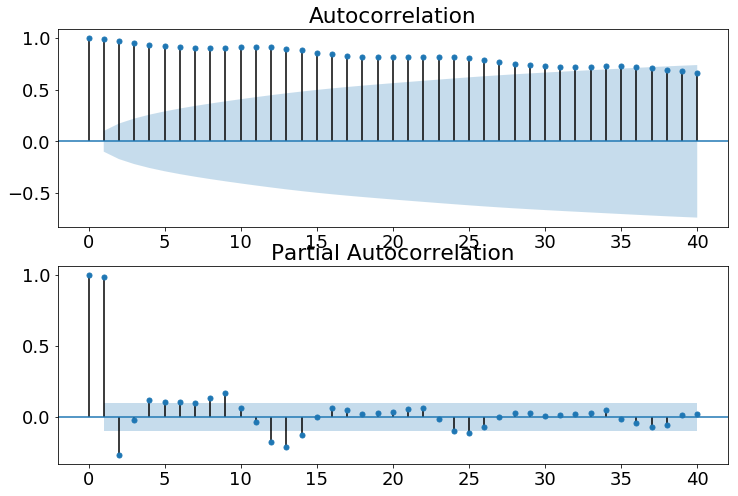

In [47]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(time_series.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(time_series, lags=40, ax=ax2)

## Build the Model

In [19]:
arma_mod20 = sm.tsa.ARMA(time_series, (2,0)).fit(disp=False)

<h3>Summary of the model</h3>

In [20]:
print(arma_mod20.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  384
Model:                     ARMA(2, 0)   Log Likelihood                -477.909
Method:                       css-mle   S.D. of innovations              0.833
Date:                Sun, 22 Apr 2018   AIC                            963.818
Time:                        10:34:34   BIC                            979.620
Sample:                    01-01-1959   HQIC                           970.086
                         - 12-01-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        332.6967      5.522     60.246      0.000     321.873     343.520
ar.L1.y        1.7039      0.036     47.523      0.000       1.634       1.774
ar.L2.y       -0.7109      0.036    -19.718      0.0

<h3>Predict and plot the predcition with confidence interval </h3>

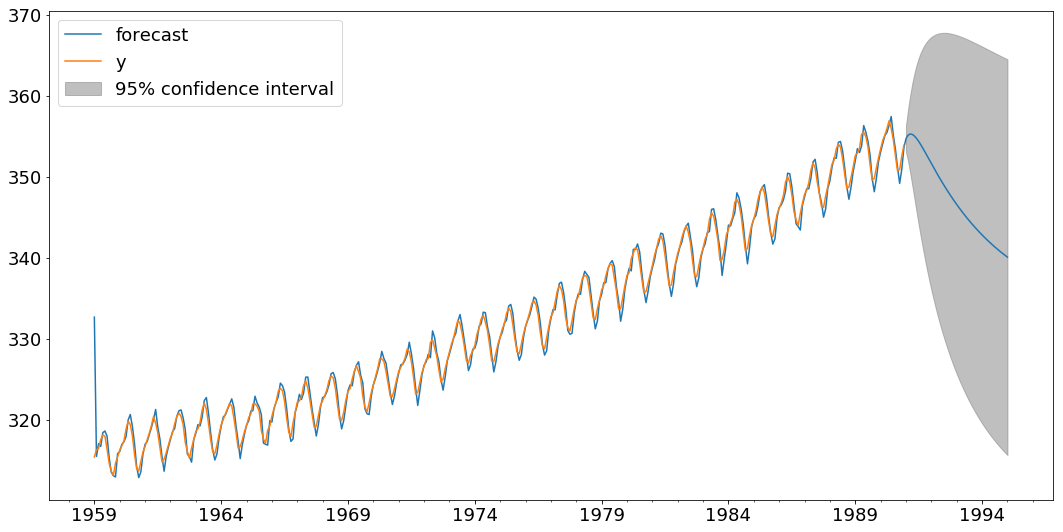

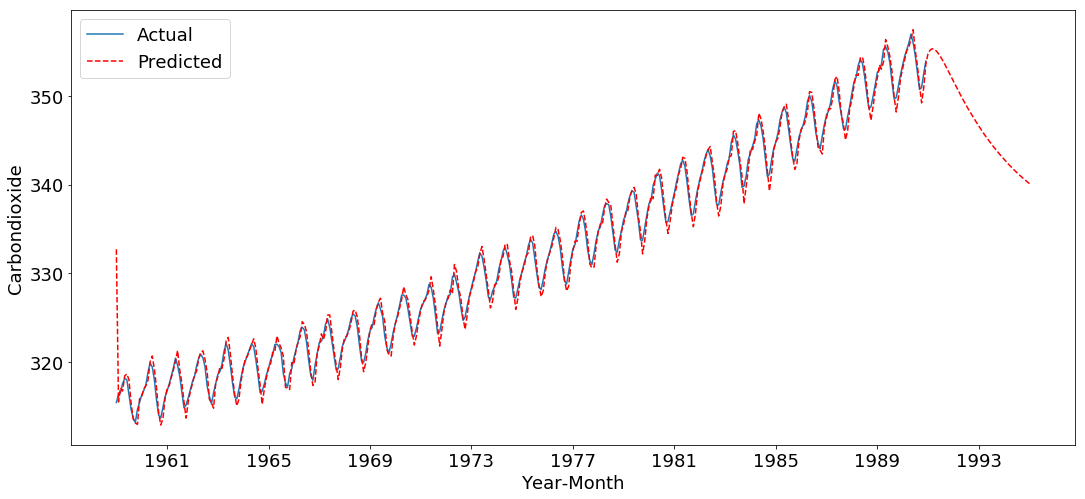

In [57]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18,9))
fig = arma_mod20.plot_predict(start='1959-01-01', end='1995-01-01', ax=ax)
legend = ax.legend(loc='upper left')

plt.figure(figsize=(18,8))
ts_predict = arma_mod20.predict('1959-01-01','1995-01-01')
plt.plot(time_series, label='Actual')
plt.plot(ts_predict, 'r--', label='Predicted')
plt.xlabel('Year-Month',)
plt.ylabel('Carbondioxide')
plt.legend(loc='best')

<h3>check the first ten and last ten prediction and compare with the actual emission</h3>

In [26]:
predcit = arma_mod20.predict(start='1959-01-01', end='1995-01-01')

In [66]:
print "\tACTUAL (1-5)"
print time_series.head()
print "\tPREDICTED (1-5)"
print predcit.head()
#predcit.tail(30)

	ACTUAL (1-5)
Month
1959-01-01    315.42
1959-02-01    316.32
1959-03-01    316.49
1959-04-01    317.56
1959-05-01    318.13
dtype: float64
	PREDICTED (1-5)
1959-01-01    332.696720
1959-02-01    315.490752
1959-03-01    317.074564
1959-04-01    316.724408
1959-05-01    318.426730
Freq: MS, dtype: float64


In [67]:
print "\tPREDICTED (last 30)"
print predcit.tail(30)

	PREDICTED (last 30)
1992-08-01    348.541119
1992-09-01    348.132717
1992-10-01    347.734226
1992-11-01    347.345574
1992-12-01    346.966640
1993-01-01    346.597268
1993-02-01    346.237284
1993-03-01    345.886495
1993-04-01    345.544700
1993-05-01    345.211695
1993-06-01    344.887272
1993-07-01    344.571222
1993-08-01    344.263340
1993-09-01    343.963421
1993-10-01    343.671265
1993-11-01    343.386675
1993-12-01    343.109457
1994-01-01    342.839423
1994-02-01    342.576388
1994-03-01    342.320171
1994-04-01    342.070597
1994-05-01    341.827493
1994-06-01    341.590693
1994-07-01    341.360034
1994-08-01    341.135356
1994-09-01    340.916504
1994-10-01    340.703328
1994-11-01    340.495680
1994-12-01    340.293418
1995-01-01    340.096400
Freq: MS, dtype: float64
